In [1]:
# REF: https://towardsdatascience.com/image-pre-processing-c1aec0be3edf
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

In [2]:
# defining global variable path
image_path = '/Users/Fox/Desktop/Data Science/Capstone/DATA'

# function to load folder into arrays and then it returns that same array

def loadImages(path):
    # Put files into lists and return them as one list of size 4
    image_files = sorted([os.path.join(path, 'test_images', file)
         for file in os.listdir(path + "/test_images") if      file.endswith('.jpg')])
 
    return image_files

In [3]:
# Display one image
def display_one(a, title1 = "Original"):
    plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.show()

In [4]:
# Display two images
def display(a, b, title1 = "Original", title2 = "Edited"):
    plt.subplot(121), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()

In [25]:
# loading image
data = loadImages(image_path)
# Getting 3 images to work with 
img = [cv2.imread(i, cv2.IMREAD_UNCHANGED) for i in data[2:20]]
print('Original size',img[0].shape)

Original size (400, 331, 3)


In [26]:
# setting dim of the resize
height = 200
width = 200
dim = (width, height)
res_img = []
for i in range(len(img)):
    res = cv2.resize(img[i], dim, interpolation=cv2.INTER_LINEAR)
    res_img.append(res)

In [27]:
# Checcking the size
print("RESIZED", res_img[1].shape)

RESIZED (200, 200, 3)


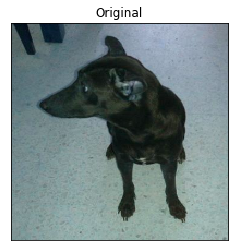

In [28]:
# Visualizing one of the images in the array
original = res_img[1]
display_one(original)

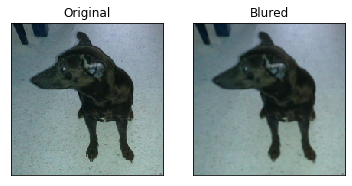

In [29]:
# Remove noise
# Gaussian
no_noise = []
for i in range(len(res_img)):
    blur = cv2.GaussianBlur(res_img[i], (3, 3), 0)
    no_noise.append(blur)


image = no_noise[1]
display(original, image, 'Original', 'Blured')

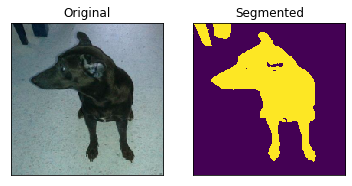

In [30]:
# Segmentation
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Displaying segmented images
display(original, thresh, 'Original', 'Segmented')

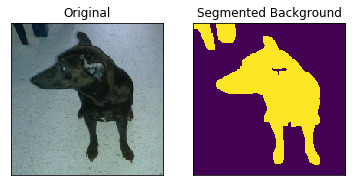

In [58]:
# Further noise removal
kernel = np.ones((2, 2), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=5)

# sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=1)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

#Displaying segmented back ground
display(original, sure_bg, 'Original', 'Segmented Background')

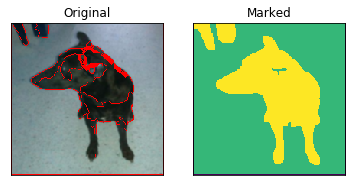

In [70]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers + 1

# Now, mark the region of unknown with zero
markers[unknown == 255] = 2

markers = cv2.watershed(image, markers)
image[markers == -1] = [255, 0, 0]

# Displaying markers on the image
display(image, markers, 'Original', 'Marked')